In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import random as ran

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Define a stock list
stocks_list = ['AAPL', 'FB', 'NFLX', 'GOOG']

stocks_data = yf.download(stocks_list, start='2015-01-01', end='2020-08-30')['Adj Close']

stocks_data.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,FB,GOOG,NFLX
Date,,,,
2014-12-31,25.100164,78.019997,524.958740,48.801430
2015-01-02,24.861401,78.449997,523.373108,49.848572
2015-01-05,24.161013,77.190002,512.463013,47.311428
2015-01-06,24.163294,76.150002,500.585632,46.501431
2015-01-07,24.502111,76.150002,499.727997,46.742859


In [3]:
daily_returns = stocks_data.pct_change().dropna()

In [4]:
mean_returns = daily_returns.mean()

In [5]:
mean_returns

AAPL    0.001289
FB      0.001129
GOOG    0.000942
NFLX    0.002022
dtype: float64

In [6]:
demean_returns = stocks_data.pct_change().dropna().copy()

for stock in stocks_list:
    demean_returns[stock] = demean_returns[stock] - mean_returns[stock]
else:
    print('Commputations completed!')

demean_returns.head()

Commputations completed!


,AAPL,FB,GOOG,NFLX
Date,,,,
2015-01-02,-0.010802,0.004383,-0.003963,0.019435
2015-01-05,-0.029461,-0.017190,-0.021788,-0.052919
2015-01-06,-0.001195,-0.014602,-0.024119,-0.019142
2015-01-07,0.012733,-0.001129,-0.002656,0.003170
2015-01-08,0.037133,0.025529,0.002211,0.020166


In [7]:
cov_matrix = demean_returns.T.dot(demean_returns) / len(stocks_data)

cov_matrix

,AAPL,FB,GOOG,NFLX
AAPL,0.000330,0.000205,0.000187,0.000196
FB,0.000205,0.000393,0.000221,0.000235
GOOG,0.000187,0.000221,0.000283,0.000221
NFLX,0.000196,0.000235,0.000221,0.000718


In [8]:
# Define equal allocations weights
w = 1 / len(stocks_list)
weights = np.full(len(stocks_list), w)

weights

array([0.25, 0.25, 0.25, 0.25])

In [9]:
# Calculate portfolio variance
portfolio_variance = (weights.T.dot(cov_matrix.values)).dot(weights)

portfolio_variance

0.0002658618341184801

In [10]:
# Optimizing weights
portfolios = pd.DataFrame(columns=['AAPL', 'FB', 'GOOG', 'NFLX', 'Ann_Returns', 'Ann_Variance'])

# Define number of stocks
no_of_stocks = 4

# Define temporary dictionary to hold data within a for loop
new_data = {}

# Generate 1000 portfolios
for i in range(0, 10000):
    
    # Generate random weights which equals to 1
    weights = np.reshape(np.random.dirichlet(np.ones(no_of_stocks), size=1), newshape=(no_of_stocks,))
    
    # Calculate daily returns of each portfolio
    daily_port_returns = (weights[0] * daily_returns[stocks_list[0]]) + \
                    (weights[1] * daily_returns[stocks_list[1]]) + \
                    (weights[2] * daily_returns[stocks_list[2]]) + \
                    (weights[3] * daily_returns[stocks_list[3]])
                
    # Calculate cumulative returns of each portfolio
    cum_returns = (1 + daily_port_returns).cumprod() - 1
    
    # Calculate annualized returns of each portfolio
    trading_days = 252
    n = len(daily_port_returns)
    ann_returns = ((1 + cum_returns[-1]) ** (trading_days/n)) - 1
    
    # Calculate daily returns of each portfolio
    daily_variance = (weights.T.dot(cov_matrix.values)).dot(weights)
    
    # Calculate annualized variance of each portfolio
    ann_variance = daily_variance * np.sqrt(252)
    
    # Print weights for each portfolio along with its annualized variance
    print(np.round(weights, 3), round(ann_variance, 6))
    
    # Append data to the dataframe
    new_data['AAPL'] = np.round(weights[0], 3)
    new_data['FB'] = np.round(weights[1], 3)
    new_data['GOOG'] = np.round(weights[2], 3)
    new_data['NFLX'] = np.round(weights[3], 3)
    new_data['Ann_Returns'] = round(ann_returns, 3)
    new_data['Ann_Variance'] = round(ann_variance, 6)
    
    portfolios = portfolios.append(new_data, ignore_index=True)

[0.058 0.242 0.403 0.298] 0.004518
[0.183 0.698 0.04  0.078] 0.004889
[0.384 0.215 0.132 0.269] 0.004323
[0.352 0.163 0.001 0.485] 0.005518
[0.233 0.037 0.503 0.227] 0.004091
[0.238 0.155 0.203 0.404] 0.004881
[0.334 0.249 0.153 0.264] 0.004304
[0.199 0.037 0.513 0.25 ] 0.004183
[0.448 0.021 0.445 0.086] 0.003859
[0.266 0.325 0.112 0.298] 0.004534
[0.036 0.115 0.835 0.014] 0.004199
[0.345 0.039 0.606 0.01 ] 0.003843
[0.337 0.069 0.536 0.058] 0.003805
[0.398 0.004 0.579 0.019] 0.003857
[0.51  0.1   0.019 0.372] 0.004905
[0.093 0.402 0.077 0.429] 0.005437
[0.698 0.134 0.151 0.017] 0.004255
[0.068 0.221 0.421 0.29 ] 0.004464
[0.049 0.409 0.376 0.166] 0.00432
[0.226 0.056 0.139 0.579] 0.006136
[0.548 0.129 0.187 0.136] 0.004056
[0.054 0.207 0.604 0.134] 0.004097
[0.027 0.34  0.454 0.18 ] 0.004289
[0.078 0.35  0.469 0.104] 0.004111
[0.316 0.273 0.272 0.139] 0.003955
[0.011 0.846 0.037 0.106] 0.00559
[0.158 0.129 0.525 0.188] 0.004034
[0.45  0.3   0.049 0.202] 0.004289
[0.618 0.079 0.194 0.1

In [11]:
portfolios

,AAPL,FB,GOOG,NFLX,Ann_Returns,Ann_Variance
0,0.058,0.242,0.403,0.298,0.382,0.004518
1,0.183,0.698,0.040,0.078,0.295,0.004889
2,0.384,0.215,0.132,0.269,0.331,0.004323
3,0.352,0.163,0.001,0.485,0.278,0.005518
4,0.233,0.037,0.503,0.227,0.423,0.004091
...,...,...,...,...,...,...
9995,0.106,0.250,0.035,0.608,0.267,0.006611
9996,0.451,0.424,0.100,0.025,0.336,0.004216
9997,0.565,0.227,0.080,0.128,0.332,0.004179
9998,0.023,0.602,0.082,0.293,0.288,0.005249


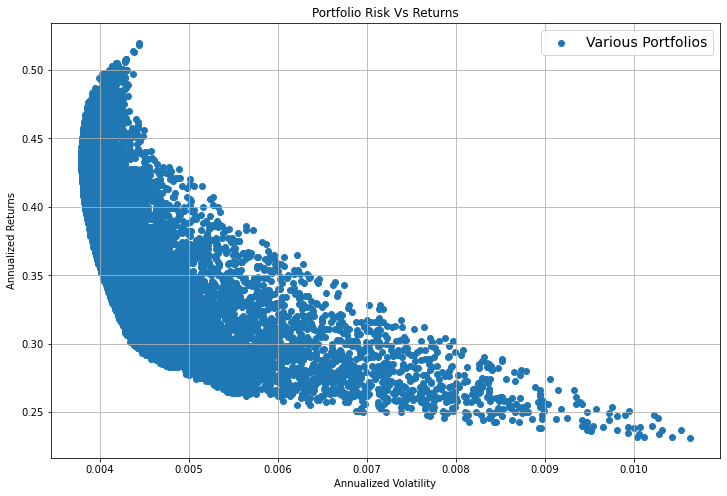

In [12]:
# Plotting it visually
fig = plt.figure(figsize=(12, 8))
plt.scatter(x='Ann_Variance', y='Ann_Returns', data=portfolios, label='Various Portfolios')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.title('Portfolio Risk Vs Returns')
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

In [13]:
# Minimum Risk Portfolio
portfolios.loc[portfolios.Ann_Variance == portfolios.Ann_Variance.min()]

,AAPL,FB,GOOG,NFLX,Ann_Returns,Ann_Variance
2959,0.336,0.134,0.486,0.044,0.436,0.003791


### Reference

- https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/